In [27]:
'''
Employee Attrition

Dataset: https://www.kaggle.com/HRAnalyticRepository/employee-attrition-data
'''


import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression


# import and basic set up  
data = pd.read_csv('~/Desktop/data analytics data sets/EE Attrition/EEAttrition.csv')

data=data.loc[:,['EmployeeID', 'age', 'length_of_service', 'city_name', 'department_name', \
                 'store_name', 'gender_short', 'termreason_desc', 'termtype_desc', 'STATUS', \
                 'BUSINESS_UNIT', 'orighiredate_key', 'birthdate_key', 'recorddate_key']]

data.columns = ['Employee ID', 'Age', 'Length of Service', 'City Name', \
                                   'Department Name', 'Store Name', 'Gender', 'Term Reason', \
                                   'Term Type', 'Status', 'Business_Unit', 'Original Hire Date', \
                                    'Birthdate', 'Record Date']

print("This is the initial import readout (filtered):\n", data)

print("------------------------------------------------------")
print("------------------------------------------------------")

This is the initial import readout (filtered):
        Employee ID  Age  Length of Service    City Name   Department Name  \
0             1318   52                 17    Vancouver         Executive   
1             1318   53                 18    Vancouver         Executive   
2             1318   54                 19    Vancouver         Executive   
3             1318   55                 20    Vancouver         Executive   
4             1318   56                 21    Vancouver         Executive   
...            ...  ...                ...          ...               ...   
49648         8258   21                  2    Valemount             Dairy   
49649         8264   19                  0    Vancouver  Customer Service   
49650         8279   21                  2   White Rock  Customer Service   
49651         8296   19                  0      Kelowna  Customer Service   
49652         8321   20                  1  Grand Forks  Customer Service   

       Store Name Gender   

In [28]:
print("DataFrame Sorted:\n",data.dtypes)

print("------------------------------------------------------")
print("------------------------------------------------------")
observations = int(data.size/len(data.columns))
print("The size of the dataframe is (including duplicates): ", observations," observations.")
print("------------------------------------------------------")
print("------------------------------------------------------")
print("The data.info function",data.info())
print("------------------------------------------------------")
print("------------------------------------------------------")
#dealing with missing data
if data.isnull().values.any() == True:
    print("There is at least one missing one value.")
else:
    print("There are no missing values.")
    
#since there are no missing values, there is no need to modify or drop any entries
print("------------------------------------------------------")
print("------------------------------------------------------")

#MISSPELLING FOUND = New Westminister and New Westminster (the first one is accurate, so change the second to the first)
data.replace("New Westminster", "New Westminister", inplace=True)

#delete duplicates of employee ID. Take the newest version of each (the one with the highest age of each employee)
data = data.sort_values(by=['Employee ID','Length of Service'], ascending=False)

#marking duplicates
duplicates = data['Employee ID'].duplicated(keep='first')

# elimating the duplicates
data = data[~duplicates]
print("Data after elimating duplicate Employee IDs:\n\b",data)
print("The number of rows after removing duplicates: ",int(data.size/len(data.columns)), "observations.")

#Export to a CSV file
#data.to_csv('~/Desktop/data analytics data sets/EE Attrition/NoDuplicates.csv')

DataFrame Sorted:
 Employee ID            int64
Age                    int64
Length of Service      int64
City Name             object
Department Name       object
Store Name             int64
Gender                object
Term Reason           object
Term Type             object
Status                object
Business_Unit         object
Original Hire Date    object
Birthdate             object
Record Date           object
dtype: object
------------------------------------------------------
------------------------------------------------------
The size of the dataframe is (including duplicates):  49653  observations.
------------------------------------------------------
------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Employee ID         49653 non-null  int64 
 1   Age     

This is the start of the descriptive statistics on the population
------------------------------------------------------
This is the describe function for the dataframe 
                Age  Length of Service
count  6284.000000        6284.000000
mean     44.671865          12.836410
std      14.071380           6.747744
min      19.000000           0.000000
1%       21.000000           1.000000
10%      25.000000           4.000000
25%      32.000000           7.000000
50%      45.000000          13.000000
75%      58.000000          19.000000
90%      64.000000          22.000000
99%      65.000000          25.000000
max      65.000000          26.000000


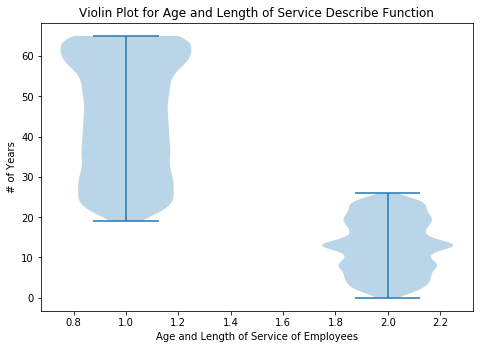

------------------------------------------------------
This is the skew function for the data
 Employee ID         -0.146261
Age                 -0.114340
Length of Service    0.041881
Store Name          -0.151908
dtype: float64
------------------------------------------------------
This is the var function (variance) for the data
 Employee ID          3.826247e+06
Age                  1.980037e+02
Length of Service    4.553204e+01
Store Name           1.796335e+02
dtype: float64
------------------------------------------------------
This is the median function for the data
 Employee ID          5180.5
Age                    45.0
Length of Service      13.0
Store Name             28.0
dtype: float64
------------------------------------------------------
This is the standard deviation function for the data
 Employee ID          1956.079548
Age                    14.071380
Length of Service       6.747744
Store Name             13.402742
dtype: float64
----------------------------------

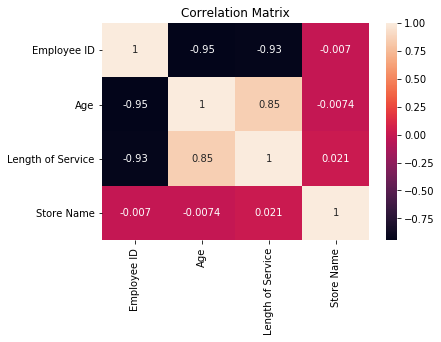

In [29]:
#describe, kurtosis, skewness, variance, median, and mode of the population
print("This is the start of the descriptive statistics on the population")
print("------------------------------------------------------")
perc= [.01, .1, .25, .5, .75, .9, .99]
numericColumns=["Age", "Length of Service"]
print("This is the describe function for the dataframe \n",data[numericColumns].describe(percentiles=perc))
data_to_plot =[data[numericColumns[0]], data[numericColumns[1]]]

fig = plt.figure()

axes = fig.add_axes([0,0,1,1])
axes.set_title("Violin Plot for Age and Length of Service Describe Function")
axes.set_xlabel("Age and Length of Service of Employees")
axes.set_ylabel("# of Years")
boxplot = axes.violinplot(data_to_plot)

plt.show()

#print("This is the kurtosis function for the data\n\n",data.kurtosis())
print("------------------------------------------------------")
print("This is the skew function for the data\n",data.skew())
print("------------------------------------------------------")
print("This is the var function (variance) for the data\n",data.var())
print("------------------------------------------------------")
print("This is the median function for the data\n",data.median())
print("------------------------------------------------------")
print("This is the standard deviation function for the data\n",data.std())
#covariances ( cov() )
print("------------------------------------------------------")
print("------------------------------------------------------")
print("This is the Covariance function (cov())\n", data.cov())

#correlation matrix (also add the visual in the form of a heatmap)
print("------------------------------------------------------")
print("------------------------------------------------------")
corrMatrix = data.corr()
print("The correlation matrix\n", corrMatrix)

axes = plt.axes()
axes.set_title("Correlation Matrix")

sbn.heatmap(corrMatrix, annot=True)

------------------------------------------------------
------------------------------------------------------
Number of Male vs Female Employees
         Employee ID
       count_nonzero
Gender              
F               3278
M               3006


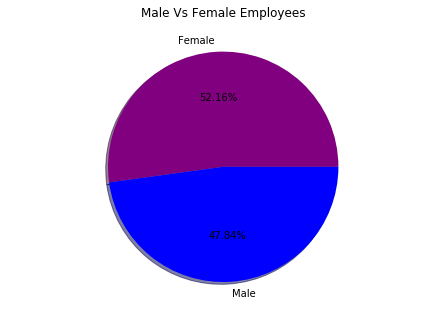

In [43]:
EEID=['Employee ID']
print("------------------------------------------------------")
print("------------------------------------------------------")
numericColumns=["Age", "Length of Service"]

print("Number of Male vs Female Employees")
groupedByGender = data.groupby(['Gender'])
print(groupedByGender[EEID].agg([np.count_nonzero]))

females=groupedByGender.get_group('F').size
males=groupedByGender.get_group('M').size

figureNumberMaleFemale=plt.figure()
axesGender=figureNumberMaleFemale.add_axes([0,0,1,1])
axesGender.axis('equal')
labels='Female', 'Male'
colors=['purple', 'blue']
genderValues = [females, males]

axesGender.pie(genderValues, shadow='True', autopct='%1.2f%%', colors=colors, labels=labels)
axesGender.set_title('Male Vs Female Employees')
plt.show()

------------------------------------------------------
------------------------------------------------------
Number of Male vs Female Employees at HQ
                       Employee ID
                     count_nonzero
Gender Business_Unit              
F      HEADOFFICE               42
       STORES                 3236
M      HEADOFFICE               38
       STORES                 2968


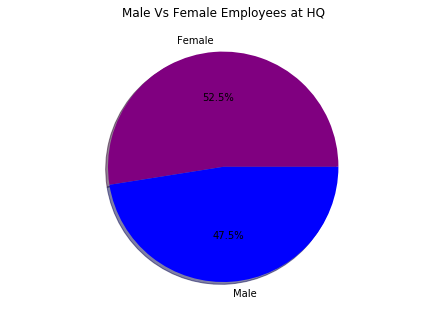

------------------------------------------------------
------------------------------------------------------


In [44]:
#focus on the HQ location
print("------------------------------------------------------")
print("------------------------------------------------------")
numericColumns=["Age", "Length of Service"]

print("Number of Male vs Female Employees at HQ")
groupedByGenderHQ = data.groupby(['Gender', 'Business_Unit'])
                      
print(groupedByGenderHQ[EEID].agg([np.count_nonzero]))

females=groupedByGenderHQ.get_group(('F', 'HEADOFFICE')).size
males=groupedByGenderHQ.get_group(('M', 'HEADOFFICE')).size

figureNumberMaleFemale=plt.figure()
axesGender=figureNumberMaleFemale.add_axes([0,0,1,1])
axesGender.axis('equal')
labels='Female', 'Male'
colors=['purple', 'blue']
genderValues = [females, males]

axesGender.pie(genderValues, shadow='True', autopct='%1.1f%%', colors=colors, labels=labels)
axesGender.set_title('Male Vs Female Employees at HQ')
plt.show()

print("------------------------------------------------------")
print("------------------------------------------------------")
numericColumns=["Age", "Length of Service"]

Number of Male vs Female Employees at Store Locations


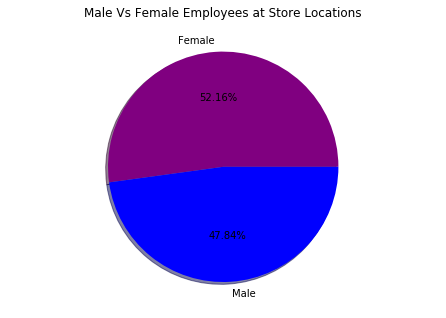

In [45]:
#Focus on the store locations (as a whole)
print("Number of Male vs Female Employees at Store Locations")
groupedByGenderStore = data.groupby(['Gender', 'Business_Unit'])

femalesStore=groupedByGenderStore.get_group(('F', 'STORES')).size
malesStore=groupedByGenderStore.get_group(('M', 'STORES')).size

figureNumberMaleFemaleStore=plt.figure()
axesGenderStore=figureNumberMaleFemaleStore.add_axes([0,0,1,1])
axesGenderStore.axis('equal')
labels='Female', 'Male'
colors=['purple', 'blue']
genderValuesStore = [femalesStore, malesStore]

axesGenderStore.pie(genderValuesStore, shadow='True', autopct='%1.2f%%', colors=colors, labels=labels)
axesGenderStore.set_title('Male Vs Female Employees at Store Locations')
plt.show()

GroupedBy Business Unit and then Gender
                       Employee ID
                     count_nonzero
Business_Unit Gender              
HEADOFFICE    F                 42
              M                 38
STORES        F               3236
              M               2968
------------------------------------------------------
------------------------------------------------------
this is the start of the GroupBy analysis
GroupedBy termination reason
                      Age                                            \
                     mean        std amin amax median count_nonzero   
Term Reason                                                           
Layoff          40.804651  13.603840   20   64     39           215   
Not Applicable  43.648238  13.328231   19   65     44          5336   
Resignaton      29.990950   9.472924   19   61     29           221   
Retirement      63.300781   2.370596   60   65     65           512   

               Length of Service    

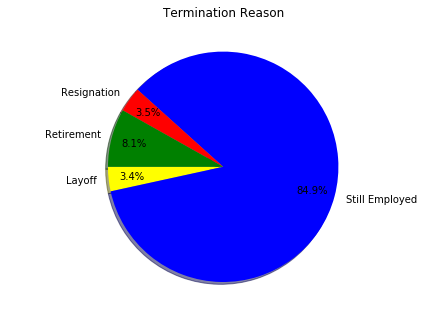

------------------------------------------------------
------------------------------------------------------


In [42]:
print("GroupedBy Business Unit and then Gender")

GroupedByBUGender = data.groupby(['Business_Unit', 'Gender'])
print(GroupedByBUGender[EEID].agg([np.count_nonzero]))
print("------------------------------------------------------")
print("------------------------------------------------------")

print("this is the start of the GroupBy analysis")
print("GroupedBy termination reason")

groupedByTermReason = data.groupby('Term Reason')
print(groupedByTermReason[numericColumns].agg([np.mean, np.std, np.amin, np.amax, np.median, np.count_nonzero]))

#pie chart of the Term Reason (LoS Count of Non-Zero)
print('\n')
figureTR = plt.figure()
axTR = figureTR.add_axes([0,0,1,1])
axTR.axis('equal')
labels = 'Layoff', 'Still Employed', 'Resignation', 'Retirement'
colors = ['yellow', 'blue', 'red', 'green']

GroupedByTR= data.groupby('Term Reason')

layoffType = GroupedByTR.get_group('Layoff').size
StillEmployedType = GroupedByTR.get_group('Not Applicable').size
ResignType = GroupedByTR.get_group('Resignaton').size
RetireType = GroupedByTR.get_group('Retirement').size

termReasonType=[layoffType, StillEmployedType, ResignType, RetireType]

axTR.pie(termReasonType, labels=labels, colors=colors, shadow='True', startangle=180, autopct='%1.1f%%', pctdistance=.8)
axTR.set_title('Termination Reason')
plt.show()

print("------------------------------------------------------")
print("------------------------------------------------------")

In [33]:
print("GroupedBy City Name")
groupedByCityName = data.groupby('City Name') 
print(groupedByCityName[numericColumns].agg([np.mean, np.std, np.amin, np.amax, np.median, np.count_nonzero]))

print('\n', 'The average of the average Age and Length of Service')
print("\n",(groupedByCityName[numericColumns].agg([np.mean])).agg([np.mean]))
print("------------------------------------------------------")
print("------------------------------------------------------")

print('\nThe Standard Deviation of the average of the average of the Age and Length of Service')
print("\n", (groupedByCityName[numericColumns].agg([np.mean])).agg([np.std]))

GroupedBy City Name
                        Age                                            \
                       mean        std amin amax median count_nonzero   
City Name                                                               
Abbotsford        43.100000  14.906488   21   65   42.0            90   
Aldergrove        44.553846  14.612741   20   65   46.0            65   
Bella Bella       39.666667  14.041954   22   63   38.0            18   
Blue River        44.000000        NaN   44   44   44.0             1   
Burnaby           43.643411  14.320293   21   65   44.0           258   
Chilliwack        44.789116  14.632592   21   65   44.0           147   
Cortes Island     47.000000  14.226735   29   64   47.5             6   
Cranbrook         43.269406  14.024733   21   65   43.0           219   
Dawson Creek      45.000000  16.139101   22   65   44.0            18   
Dease Lake        50.000000   8.485281   44   56   50.0             2   
Fort Nelson       40.936170  13

In [34]:
print("groupedBy Department Name")
groupedByDepartmentName = data.groupby('Department Name')
print(groupedByDepartmentName[numericColumns].agg([np.mean, np.std]))

groupedBy Department Name
                              Age            Length of Service          
                             mean        std              mean       std
Department Name                                                         
Accounting              64.833333   0.408248         24.833333  0.408248
Accounts Payable        62.750000   2.500000         22.750000  2.500000
Accounts Receiveable    62.000000   2.738613         22.000000  2.738613
Audit                   60.500000   2.380476         20.500000  2.380476
Bakery                  45.753898   8.913220         14.144766  4.415840
Compensation            60.250000   2.500000         20.250000  2.500000
Customer Service        30.780672  11.090565          6.714286  5.938772
Dairy                   39.840271  11.248800         10.905131  5.021533
Employee Records        63.166667   2.483277         22.333333  2.581989
Executive               56.900000   3.348300         26.000000  0.000000
HR Technology           6

In [35]:
print("groupedBy Business Unit then Department Name")
groupedByBUDN= data.groupby(['Business_Unit', 'Department Name'])
print(groupedByBUDN[numericColumns].agg([np.count_nonzero, np.mean, np.std, np.min, np.max]))

groupedBy Business Unit then Department Name
                                               Age                             \
                                     count_nonzero       mean        std amin   
Business_Unit Department Name                                                   
HEADOFFICE    Accounting                         6  64.833333   0.408248   64   
              Accounts Payable                   4  62.750000   2.500000   59   
              Accounts Receiveable               5  62.000000   2.738613   59   
              Audit                              4  60.500000   2.380476   59   
              Compensation                       4  60.250000   2.500000   59   
              Employee Records                   6  63.166667   2.483277   60   
              Executive                         10  56.900000   3.348300   51   
              HR Technology                      9  62.888889   3.059593   57   
              Information Technology             5  59.000000   

In [36]:
print("------------------------------------------------------")
print("------------------------------------------------------")
# linear regression
# age vs length_of_service
X=data['Age'].values.reshape(-1, 1)
y=data['Length of Service'].values.reshape(-1, 1)
linreg = LinearRegression(normalize=True, n_jobs=2).fit(X, y)
print("Linear Regression between Age and Length of Service")
print("The coefficient of determination (R squared) is:\t",float(linreg.score(X,y)))
print("The coefficient (a) of this linear regression is:\t",float(linreg.coef_)) #a
print("The intercept (b) of this linear regression is:\t\t", float(linreg.intercept_)) #b
print("------------------------------------------------------")
print("------------------------------------------------------")

def predictedLoS(age):
    return print("The predicted length of service for someone aged", age, "is", 
                 int(linreg.coef_ * age + linreg.intercept_), "\b.")

predictedLoS(35)
predictedLoS(60)

print("------------------------------------------------------")
print("------------------------------------------------------")

------------------------------------------------------
------------------------------------------------------
Linear Regression between Age and Length of Service
The coefficient of determination (R squared) is:	 0.7279476682707341
The coefficient (a) of this linear regression is:	 0.4091400309256765
The intercept (b) of this linear regression is:		 -5.440638319763535
------------------------------------------------------
------------------------------------------------------
The predicted length of service for someone aged 35 is 8.
The predicted length of service for someone aged 60 is 19.
------------------------------------------------------
------------------------------------------------------


In [37]:
print("------------------------------------------------------")
print("------------------------------------------------------")

#Of those who were/are terminated, what is the breakdown of why?
groupedByTermTypeReason = data.groupby(['Term Type', 'Term Reason'])
print("GroupedBy Term Type then Term Reason\n", groupedByTermTypeReason[numericColumns]
      .agg([np.count_nonzero, np.mean, np.std, np.min, np.max]))

------------------------------------------------------
------------------------------------------------------
GroupedBy Term Type then Term Reason
                                         Age                                  \
                              count_nonzero       mean        std amin amax   
Term Type      Term Reason                                                    
Involuntary    Layoff                   215  40.804651  13.603840   20   64   
Not Applicable Not Applicable          5336  43.648238  13.328231   19   65   
Voluntary      Resignaton               221  29.990950   9.472924   19   61   
               Retirement               512  63.300781   2.370596   60   65   

                              Length of Service                                 
                                  count_nonzero       mean       std amin amax  
Term Type      Term Reason                                                      
Involuntary    Layoff                       215  11.948

Group by Age Ranges


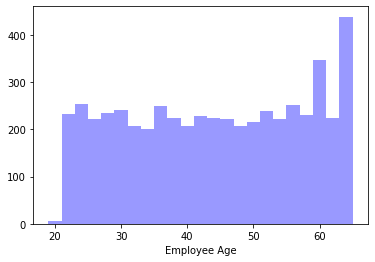

In [38]:
print("Group by Age Ranges")
ageColumn=data.loc[data['Status']== 'ACTIVE',['Age']]

sbn.set_color_codes()

ax=sbn.distplot(ageColumn, color="blue", kde=False, bins=23, axlabel="Employee Age")

In [39]:
print("Length of Service by Gender")
print("Descriptive Statistics")

groupedByGenders= data.groupby(['Gender'])
length_of_service=["Length of Service"]
print(groupedByGender[length_of_service]
      .agg([np.count_nonzero, np.mean, np.std, np.min, np.max]))

Length of Service by Gender
Descriptive Statistics
       Length of Service                               
           count_nonzero       mean       std amin amax
Gender                                                 
F                   3265  13.159549  6.711127    0   26
M                   2988  12.484032  6.771004    0   26
